<Axes: >

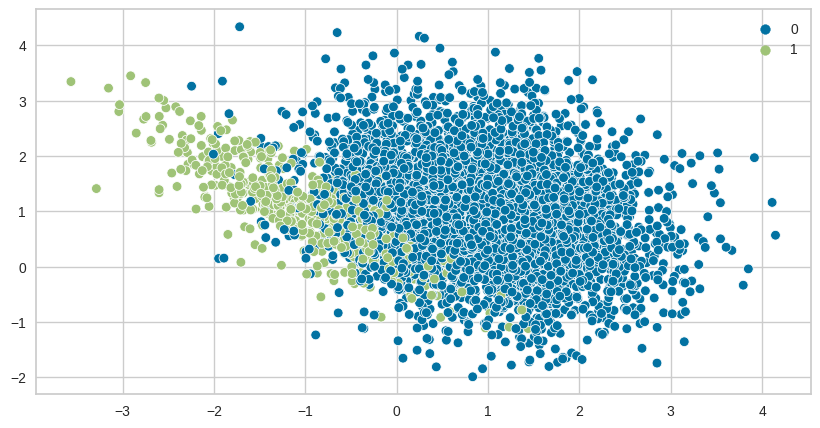

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.target import ClassBalance
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X, y = make_classification(n_samples =5000, n_features =2, n_redundant =0, n_clusters_per_class =1, weights =[0.90] ,
flip_y=0, random_state =1)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

Описание каждой балансировки ищи в конспекте

<Axes: >

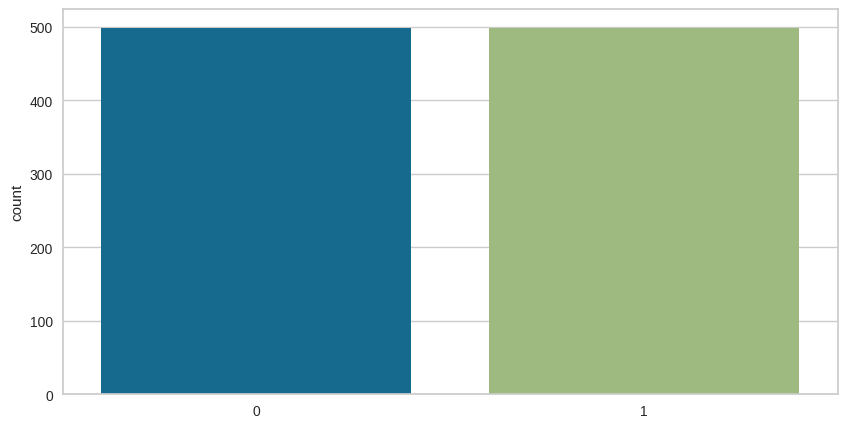

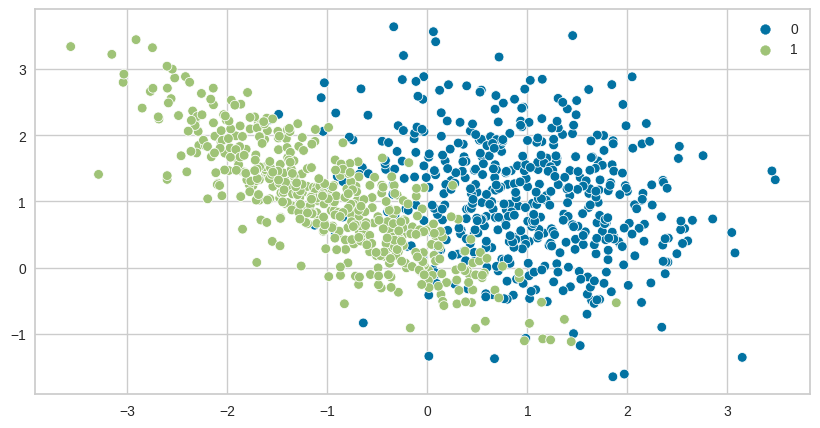

In [75]:
undersample = RandomUnderSampler(random_state =0)
X_random, y_random = undersample.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_random)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_random[:,0], y=X_random[:,1], hue=y_random)

<Axes: >

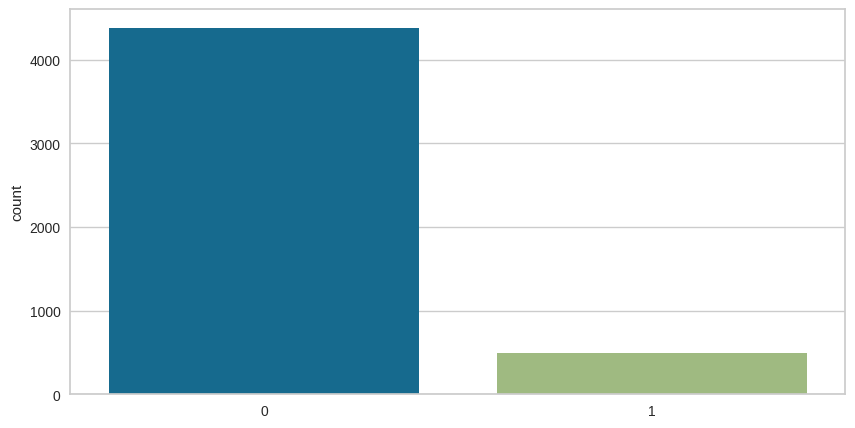

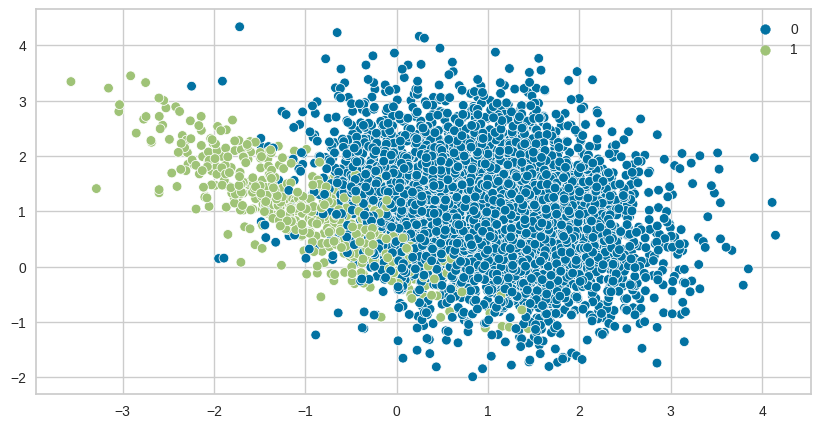

In [76]:
undersample = TomekLinks ()
X_tomek, y_tomek = undersample.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_tomek)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_tomek[:,0], y=X_tomek[:,1], hue=y_tomek)

<Axes: >

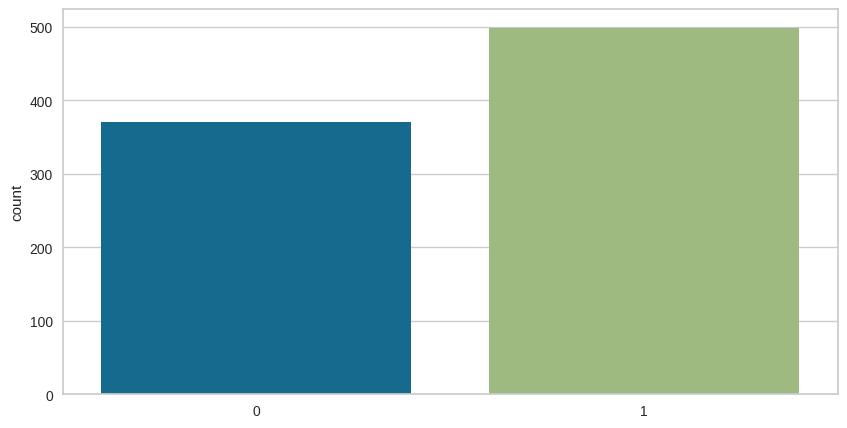

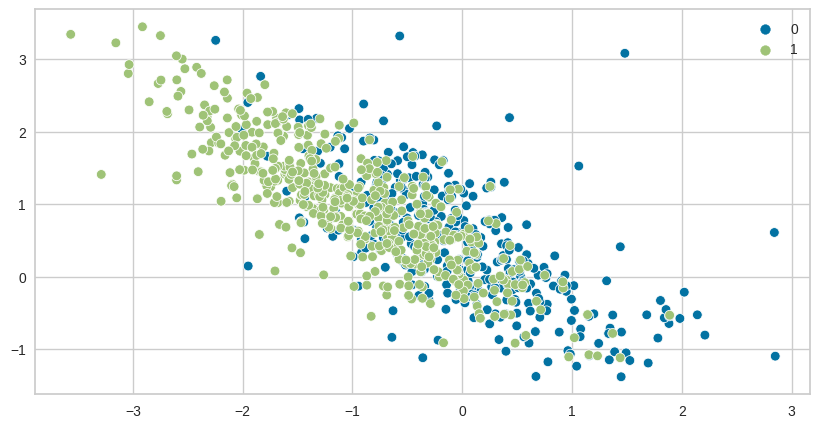

In [77]:
undersample = CondensedNearestNeighbour(n_neighbors =1)
X_CNN, y_CNN = undersample.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_CNN)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_CNN[:,0], y=X_CNN[:,1], hue=y_CNN)

<Axes: >

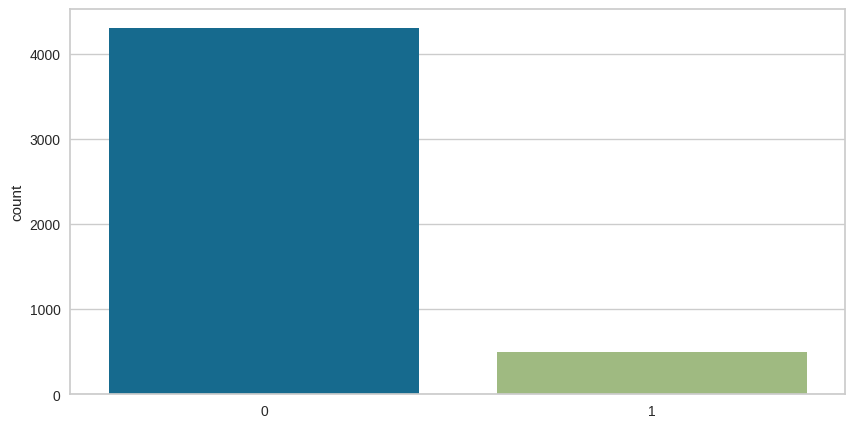

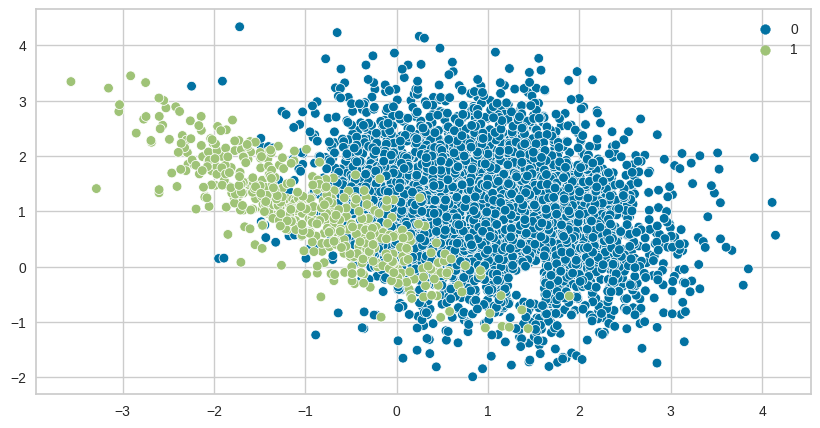

In [78]:
undersample = OneSidedSelection ()
X_OSS , y_OSS = undersample.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_OSS)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_OSS[:,0], y=X_OSS[:,1], hue=y_OSS)

<Axes: >

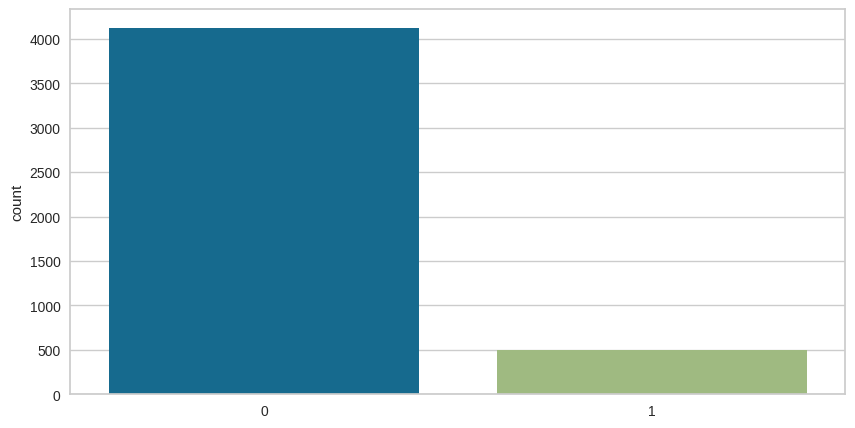

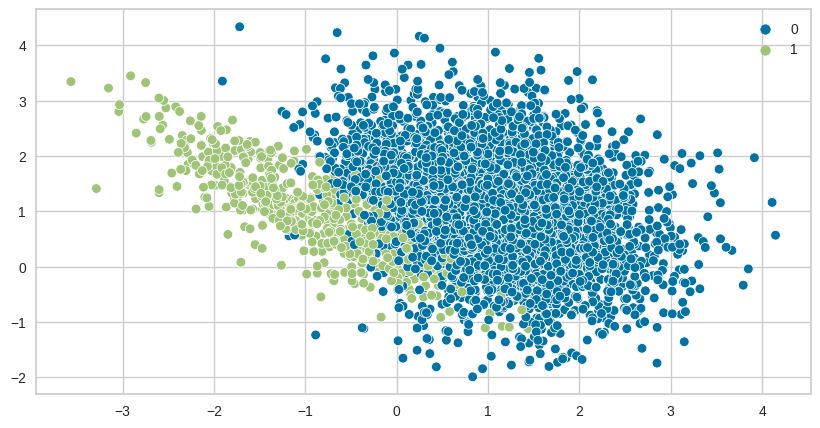

In [79]:
undersample = NeighbourhoodCleaningRule()
X_NCR, y_NCR = undersample.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_NCR)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_NCR[:,0], y=X_NCR[:,1], hue=y_NCR)

<Axes: >

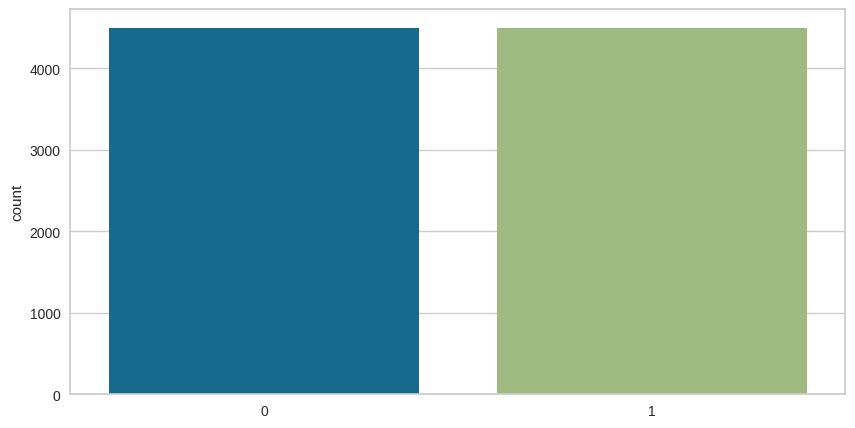

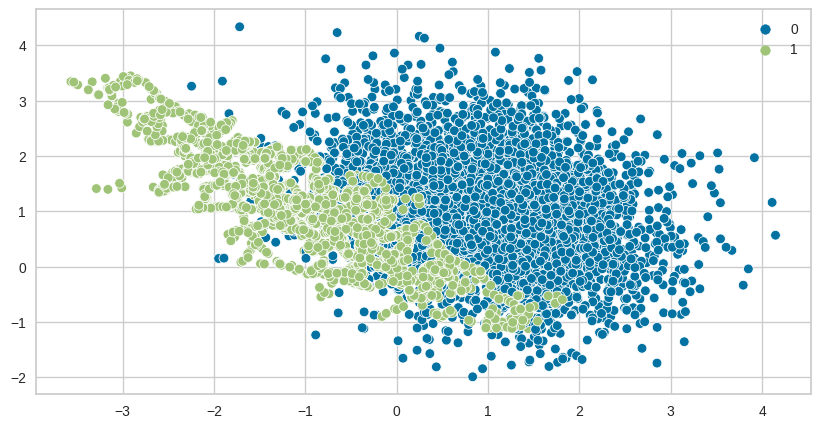

In [80]:
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_SMOTE)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_SMOTE[:,0], y=X_SMOTE[:,1], hue=y_SMOTE)

Этот метод адаптивно регулирует количество синтетических примеров в зависимости от плотности распределения классов. Там, где класс представлен менее плотно, генерируется больше синтетических примеров.

<Axes: >

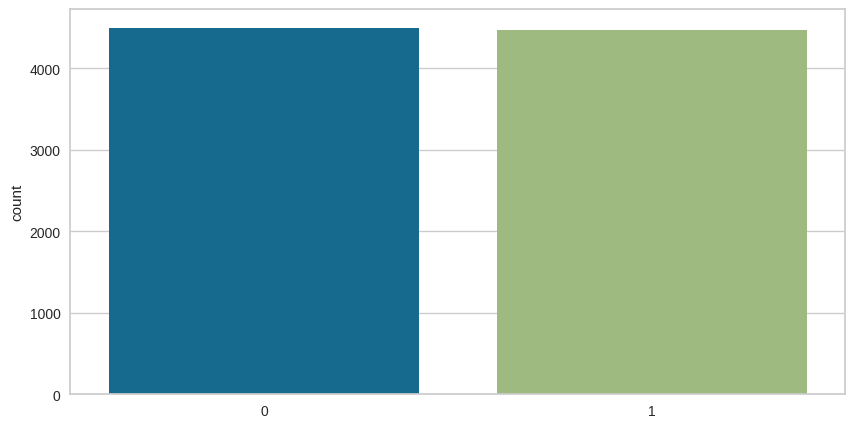

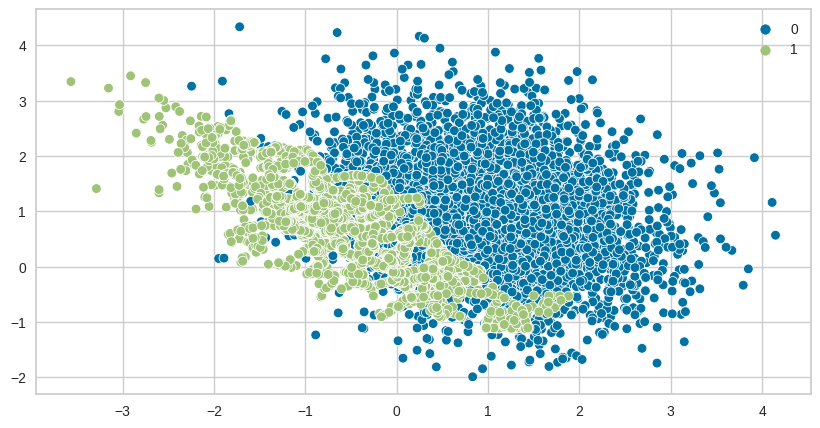

In [81]:
adasyn = ADASYN(random_state=42)
X_ADASYN, y_ADASYN = adasyn.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_ADASYN)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_ADASYN[:,0], y=X_ADASYN[:,1], hue=y_ADASYN)

Простой метод, который случайным образом дублирует примеры из миноритарного класса, чтобы уравновесить классы. Этот метод может быть эффективным, но также может привести к переобучению модели на сгенерированных примерах.

<Axes: >

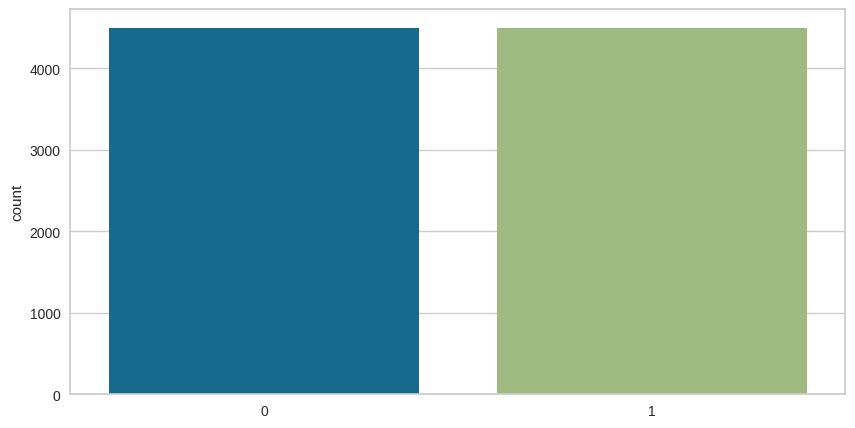

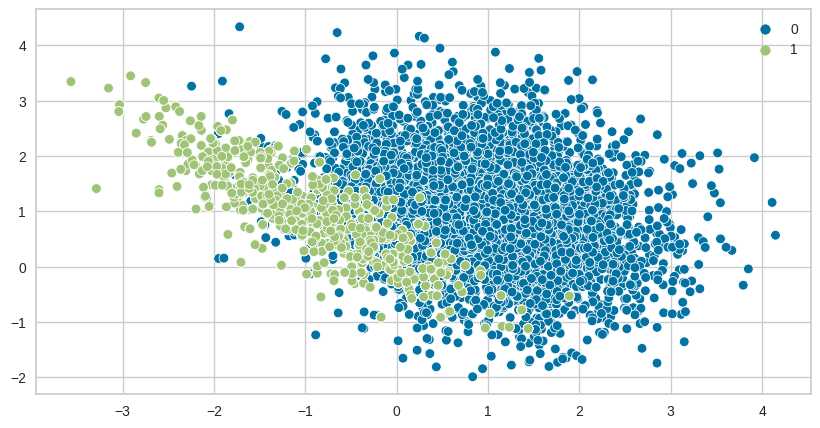

In [82]:
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X, y)
plt.figure(figsize=(10,5))
sns.countplot(x=y_ROS)
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_ROS[:,0], y=X_ROS[:,1], hue=y_ROS)

Попробуем на примере оценить качество сбалансированного и несбалансированной выборки

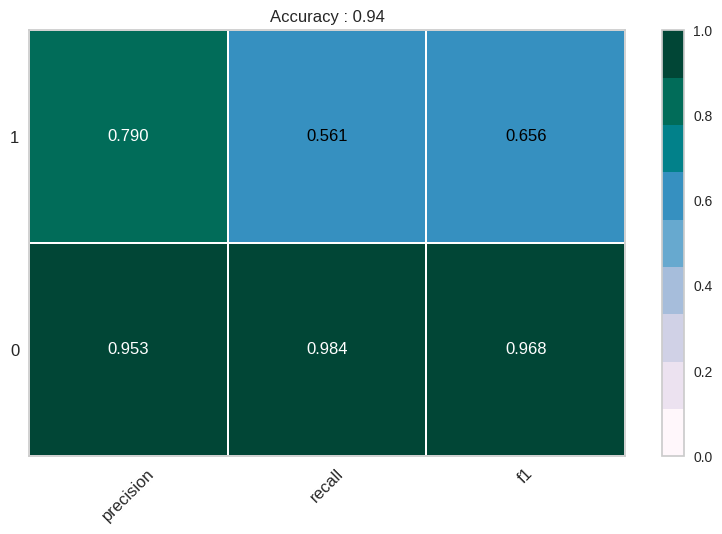

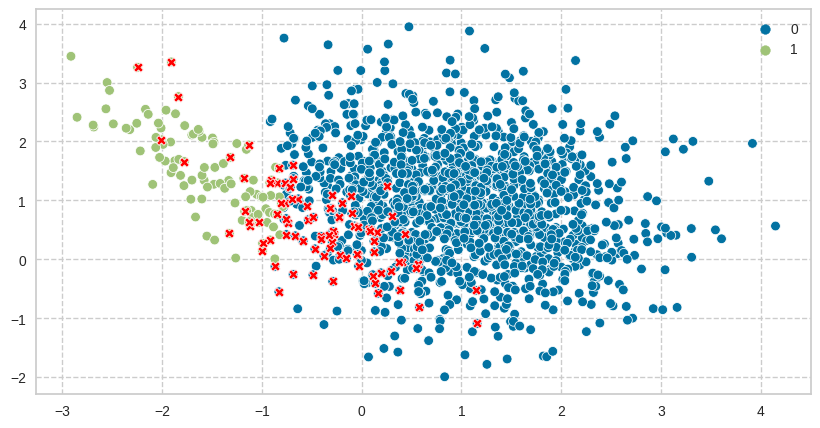

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3, random_state =1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
visualizer_report = ClassificationReport(nb, cmap="PuBuGn")#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train, y_train)
visualizer_report.score(X_test , y_test)
visualizer_report.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_report.show()
errors = y_pred != y_test
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred)
sns.scatterplot(x=X_test[errors,0], y=X_test[errors,1], c='red', marker="X")
plt.grid(linestyle="--")
plt.show()

Попробуем самые эффективные на мой взгляд алгоритмы

In [92]:
undersample = TomekLinks ()
X_tomek, y_tomek = undersample.fit_resample(X, y)


In [91]:
undersample = NeighbourhoodCleaningRule()
X_NCR, y_NCR = undersample.fit_resample(X_tomek, y_tomek)


По сути этими двумя алгоритмами мы просто отсекли небольшой шум и все

In [90]:
smote = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = smote.fit_resample(X_NCR, y_NCR)


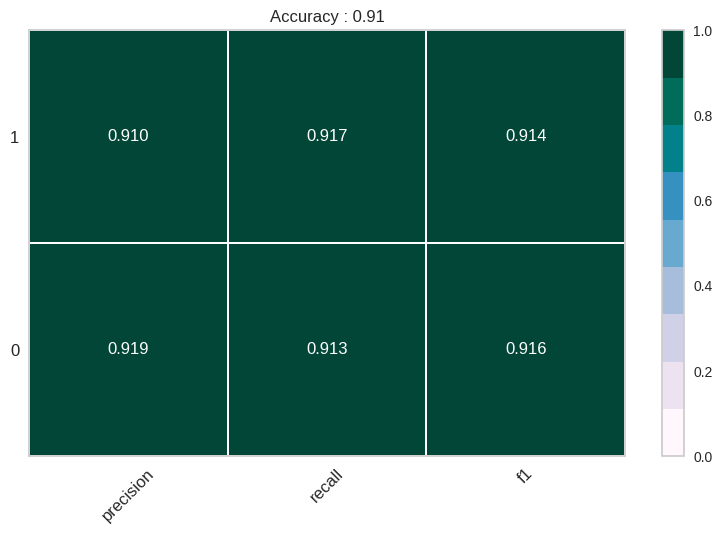

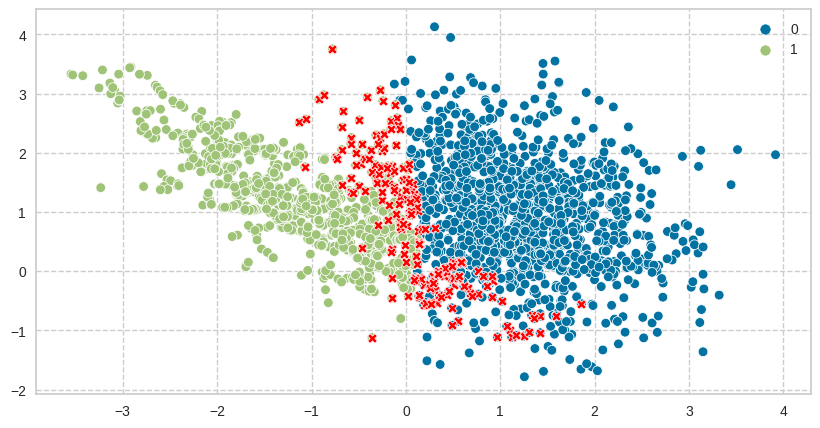

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
X_train , X_test , y_train , y_test = train_test_split(X_SMOTE, y_SMOTE, test_size =0.3, random_state =1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
visualizer_report = ClassificationReport(nb, cmap="PuBuGn")#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train, y_train)
visualizer_report.score(X_test , y_test)
visualizer_report.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_report.show()
errors = y_pred != y_test
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred)
sns.scatterplot(x=X_test[errors,0], y=X_test[errors,1], c='red', marker="X")
plt.grid(linestyle="--")
plt.show()

Стало намного лучше

Посмотрим еще как рандомный алгоритм балансировки справится

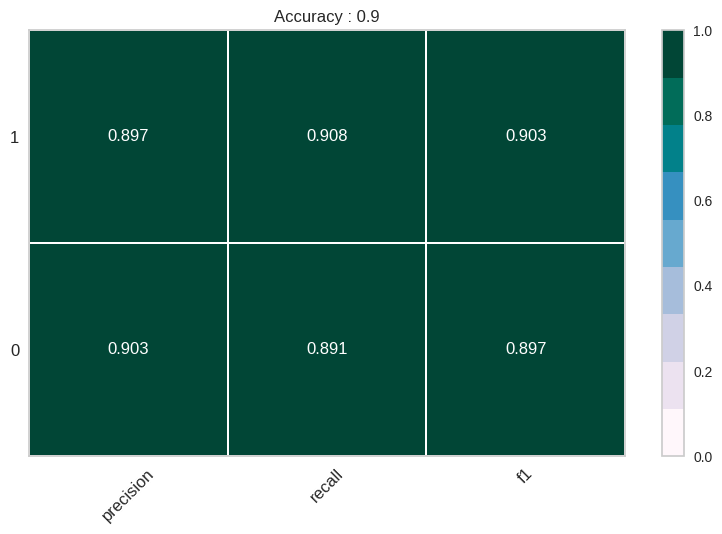

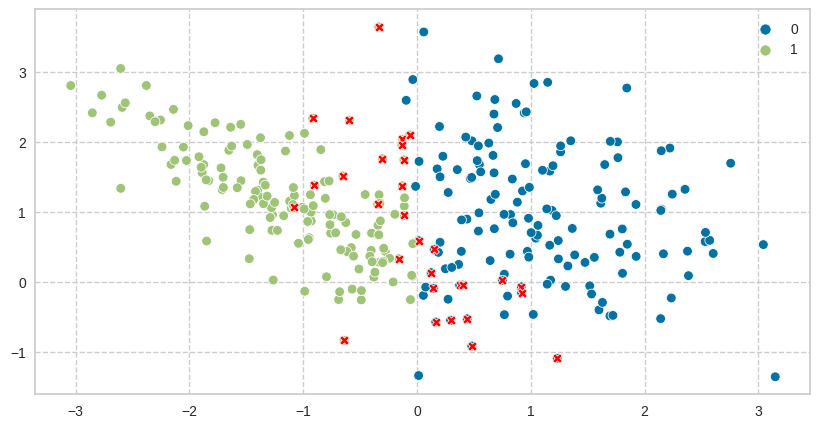

In [88]:
undersample = RandomUnderSampler(random_state =0)
X_random, y_random = undersample.fit_resample(X, y)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
X_train , X_test , y_train , y_test = train_test_split(X_random, y_random, test_size =0.3, random_state =1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
visualizer_report = ClassificationReport(nb, cmap="PuBuGn")#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train, y_train)
visualizer_report.score(X_test , y_test)
visualizer_report.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_report.show()
errors = y_pred != y_test
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred)
sns.scatterplot(x=X_test[errors,0], y=X_test[errors,1], c='red', marker="X")
plt.grid(linestyle="--")
plt.show()

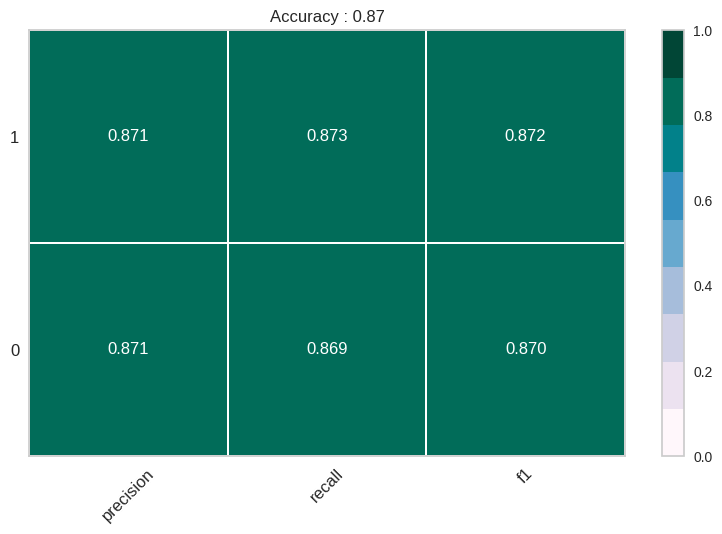

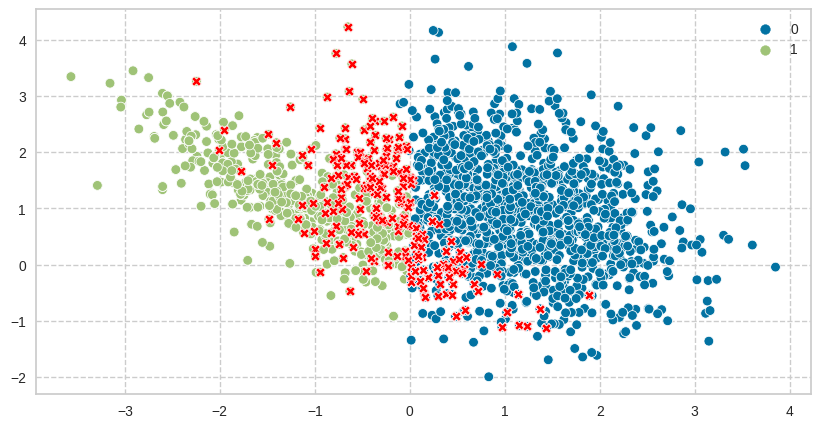

In [89]:
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X, y)
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
X_train , X_test , y_train , y_test = train_test_split(X_ROS, y_ROS, test_size =0.3, random_state =1)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
visualizer_report = ClassificationReport(nb, cmap="PuBuGn")#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train, y_train)
visualizer_report.score(X_test , y_test)
visualizer_report.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_report.show()
errors = y_pred != y_test
plt.figure(figsize=(10,5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred)
sns.scatterplot(x=X_test[errors,0], y=X_test[errors,1], c='red', marker="X")
plt.grid(linestyle="--")
plt.show()

В среднем чуть хуже. Ну это логично, легче что-то удалить, чем что-то создать новое